In [1]:
import scvelo as scv
import scanpy as sc
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
scv.set_figure_params('scvelo')
scv.settings.presenter_view = True

In [2]:
adata = scv.read("../tmp/06.HS_BM_donor1.h5ad")
adata

AnnData object with n_obs × n_vars = 6195 × 17220
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'donor', 'DF.classifications', 'S.Score', 'G2M.Score', 'Phase', 'RNA_snn_res.0.1', 'RNA_snn_res.0.2', 'RNA_snn_res.0.4', 'RNA_snn_res.0.6', 'RNA_snn_res.0.8', 'RNA_snn_res.1', 'seurat_clusters', 'celltype'
    var: 'features', 'spliced_features', 'unspliced_features'
    obsm: 'X_diffusion.map', 'X_dm.tsne', 'X_dm.umap', 'X_fr', 'X_pca', 'X_tsne', 'X_umap'
    layers: 'spliced', 'unspliced'

In [3]:
adata.obs['seurat_clusters'] = adata.obs['seurat_clusters'].astype('category')
adata.obs['celltype'] = adata.obs['celltype'].astype('category')

In [4]:
adata = adata[adata.obs.celltype.isin(["HSC", "Ery"]), ]
adata

View of AnnData object with n_obs × n_vars = 2192 × 17220
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'donor', 'DF.classifications', 'S.Score', 'G2M.Score', 'Phase', 'RNA_snn_res.0.1', 'RNA_snn_res.0.2', 'RNA_snn_res.0.4', 'RNA_snn_res.0.6', 'RNA_snn_res.0.8', 'RNA_snn_res.1', 'seurat_clusters', 'celltype'
    var: 'features', 'spliced_features', 'unspliced_features'
    obsm: 'X_diffusion.map', 'X_dm.tsne', 'X_dm.umap', 'X_fr', 'X_pca', 'X_tsne', 'X_umap'
    layers: 'spliced', 'unspliced'

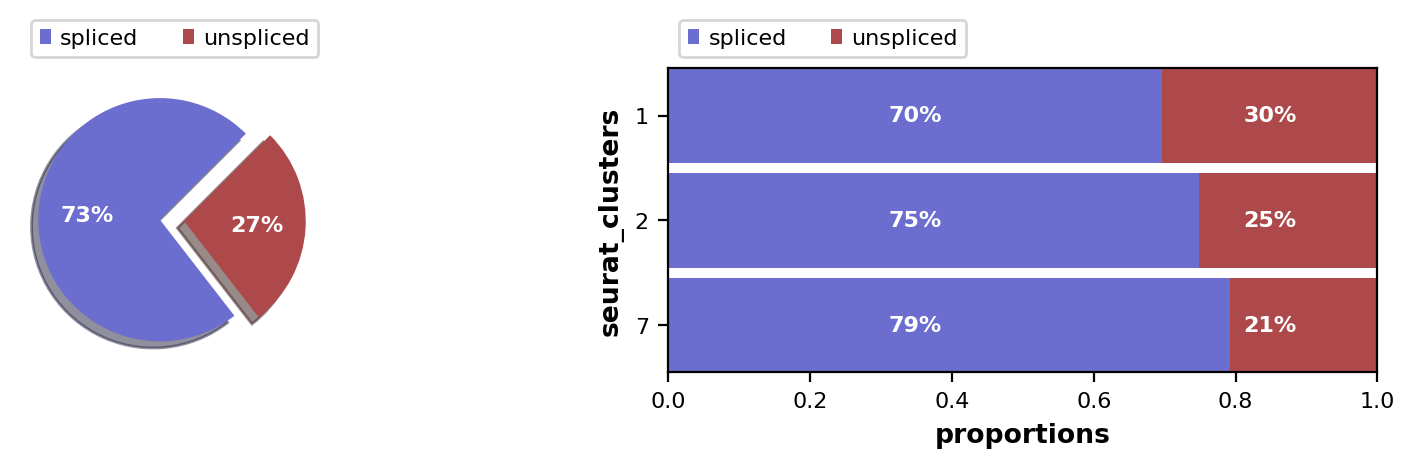

In [16]:
scv.pl.proportions(adata, groupby = "seurat_clusters")

In [6]:
scv.pp.filter_and_normalize(adata, min_shared_counts=50, n_top_genes=500)

Filtered out 12764 genes that are detected 50 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 500 highly variable genes.
Logarithmized X.


In [7]:
scv.pp.moments(adata, n_pcs=30, use_rep="X_pca", n_neighbors=30)

computing neighbors
    finished (0:00:10) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [8]:
scv.tl.velocity(adata, mode='steady_state')

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [9]:
scv.tl.velocity_graph(adata)

computing velocity graph (using 1/24 cores)


  0%|          | 0/2192 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_fr', embedded velocity vectors (adata.obsm)


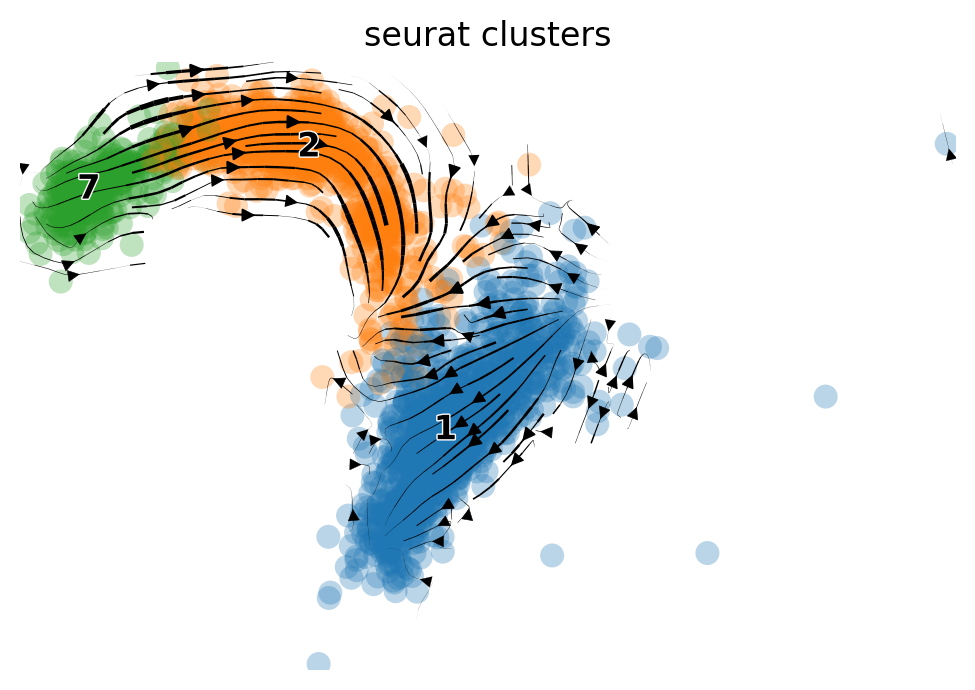

In [10]:
scv.pl.velocity_embedding_stream(adata, basis="X_fr", color="seurat_clusters")

In [11]:
scv.tl.rank_velocity_genes(adata, groupby='seurat_clusters', min_corr=.3)

df = scv.DataFrame(adata.uns['rank_velocity_genes']['names'])
df.head(10)

ranking velocity genes
    finished (0:00:00) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


/home/jarning/.conda/envs/scvelo/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `scvelo.read_load.get_df` is deprecated since scVelo v0.2.4 and will be removed in a future version. Please use `scvelo.core.get_df` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


1         2         7
0   LINC01122    ZBTB16   SLC40A1
1     COL24A1    ZBTB20     YPEL5
2       PRKCH   ZNF385D      SELL
3       MEIS1       CA2      NFIA
4      ATP8B4      SELL      CKS2
5      PDZRN4       AVP       AVP
6   IL12A-AS1   SLC40A1  SERPINB1
7  AJ009632.2      LST1     IFI16
8     ZFP36L1  SERPINB1      CD36
9     LNCAROD    FAM30A    NFKBIZ

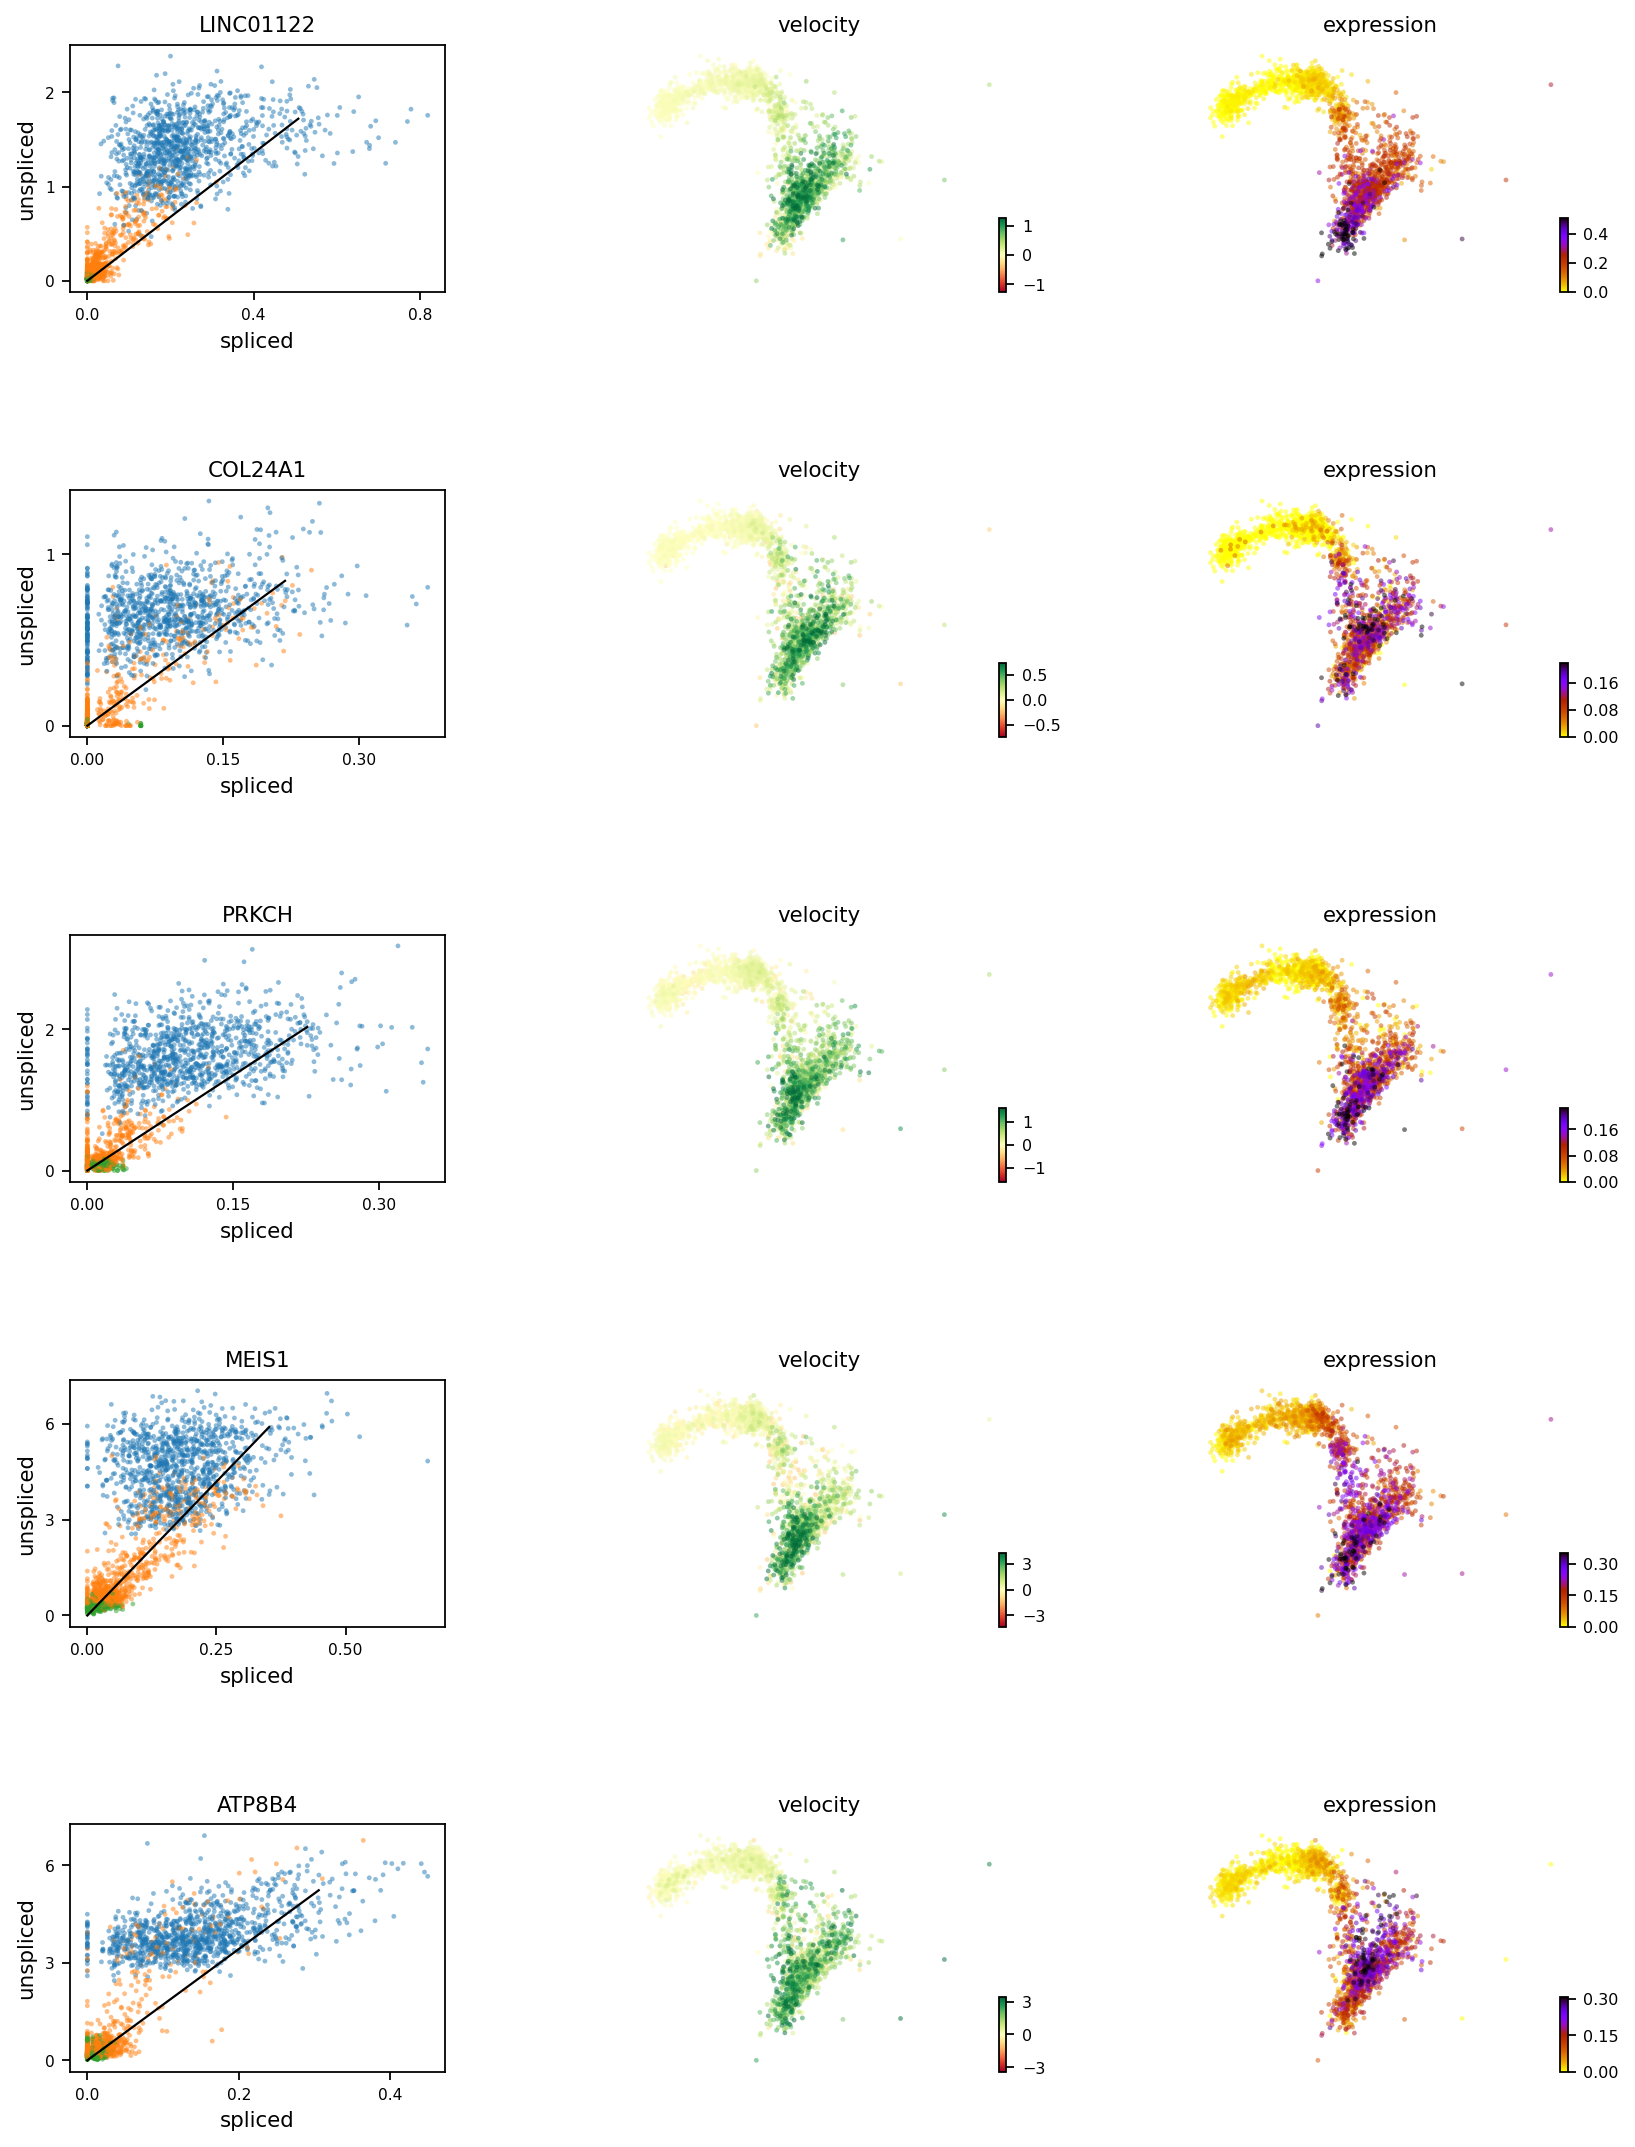

In [15]:
genes = df["1"].tolist()[0:5]
scv.pl.velocity(adata, genes, color="seurat_clusters", basis="X_fr", ncols=1, figsize=(6,5), dpi=600)

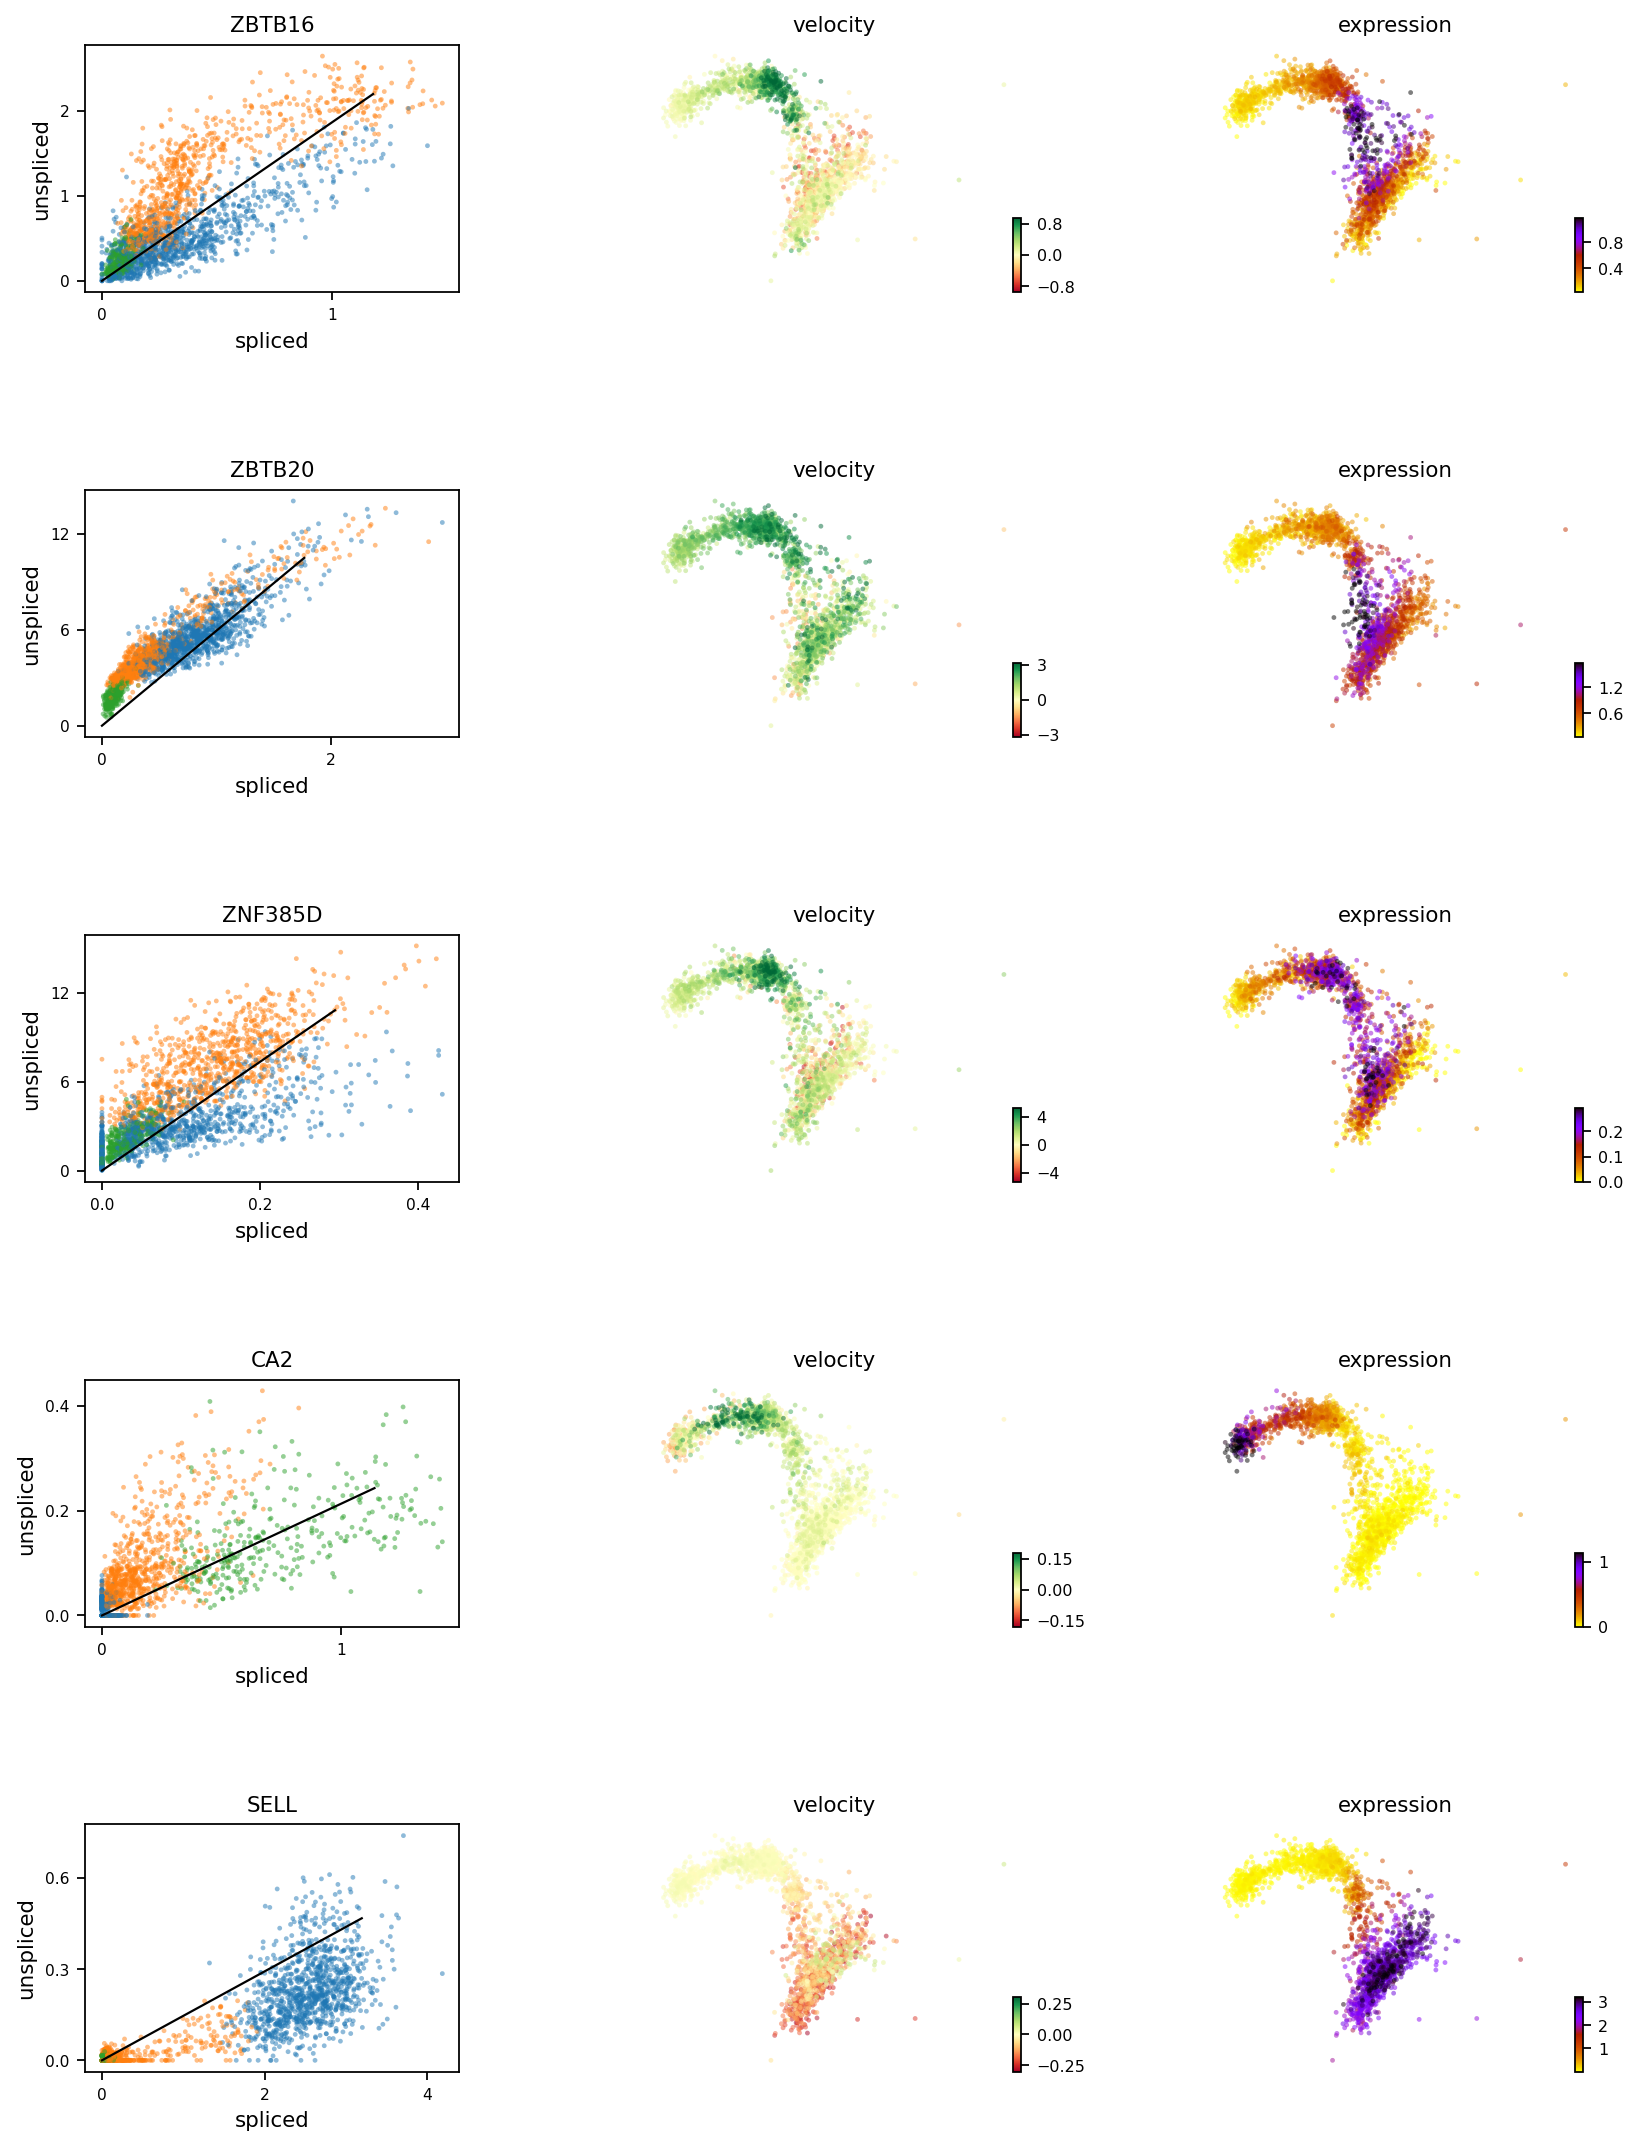

In [14]:
genes = df["2"].tolist()[0:5]
scv.pl.velocity(adata, genes, color="seurat_clusters", basis="X_fr", ncols=1, figsize=(6,5), dpi=600)

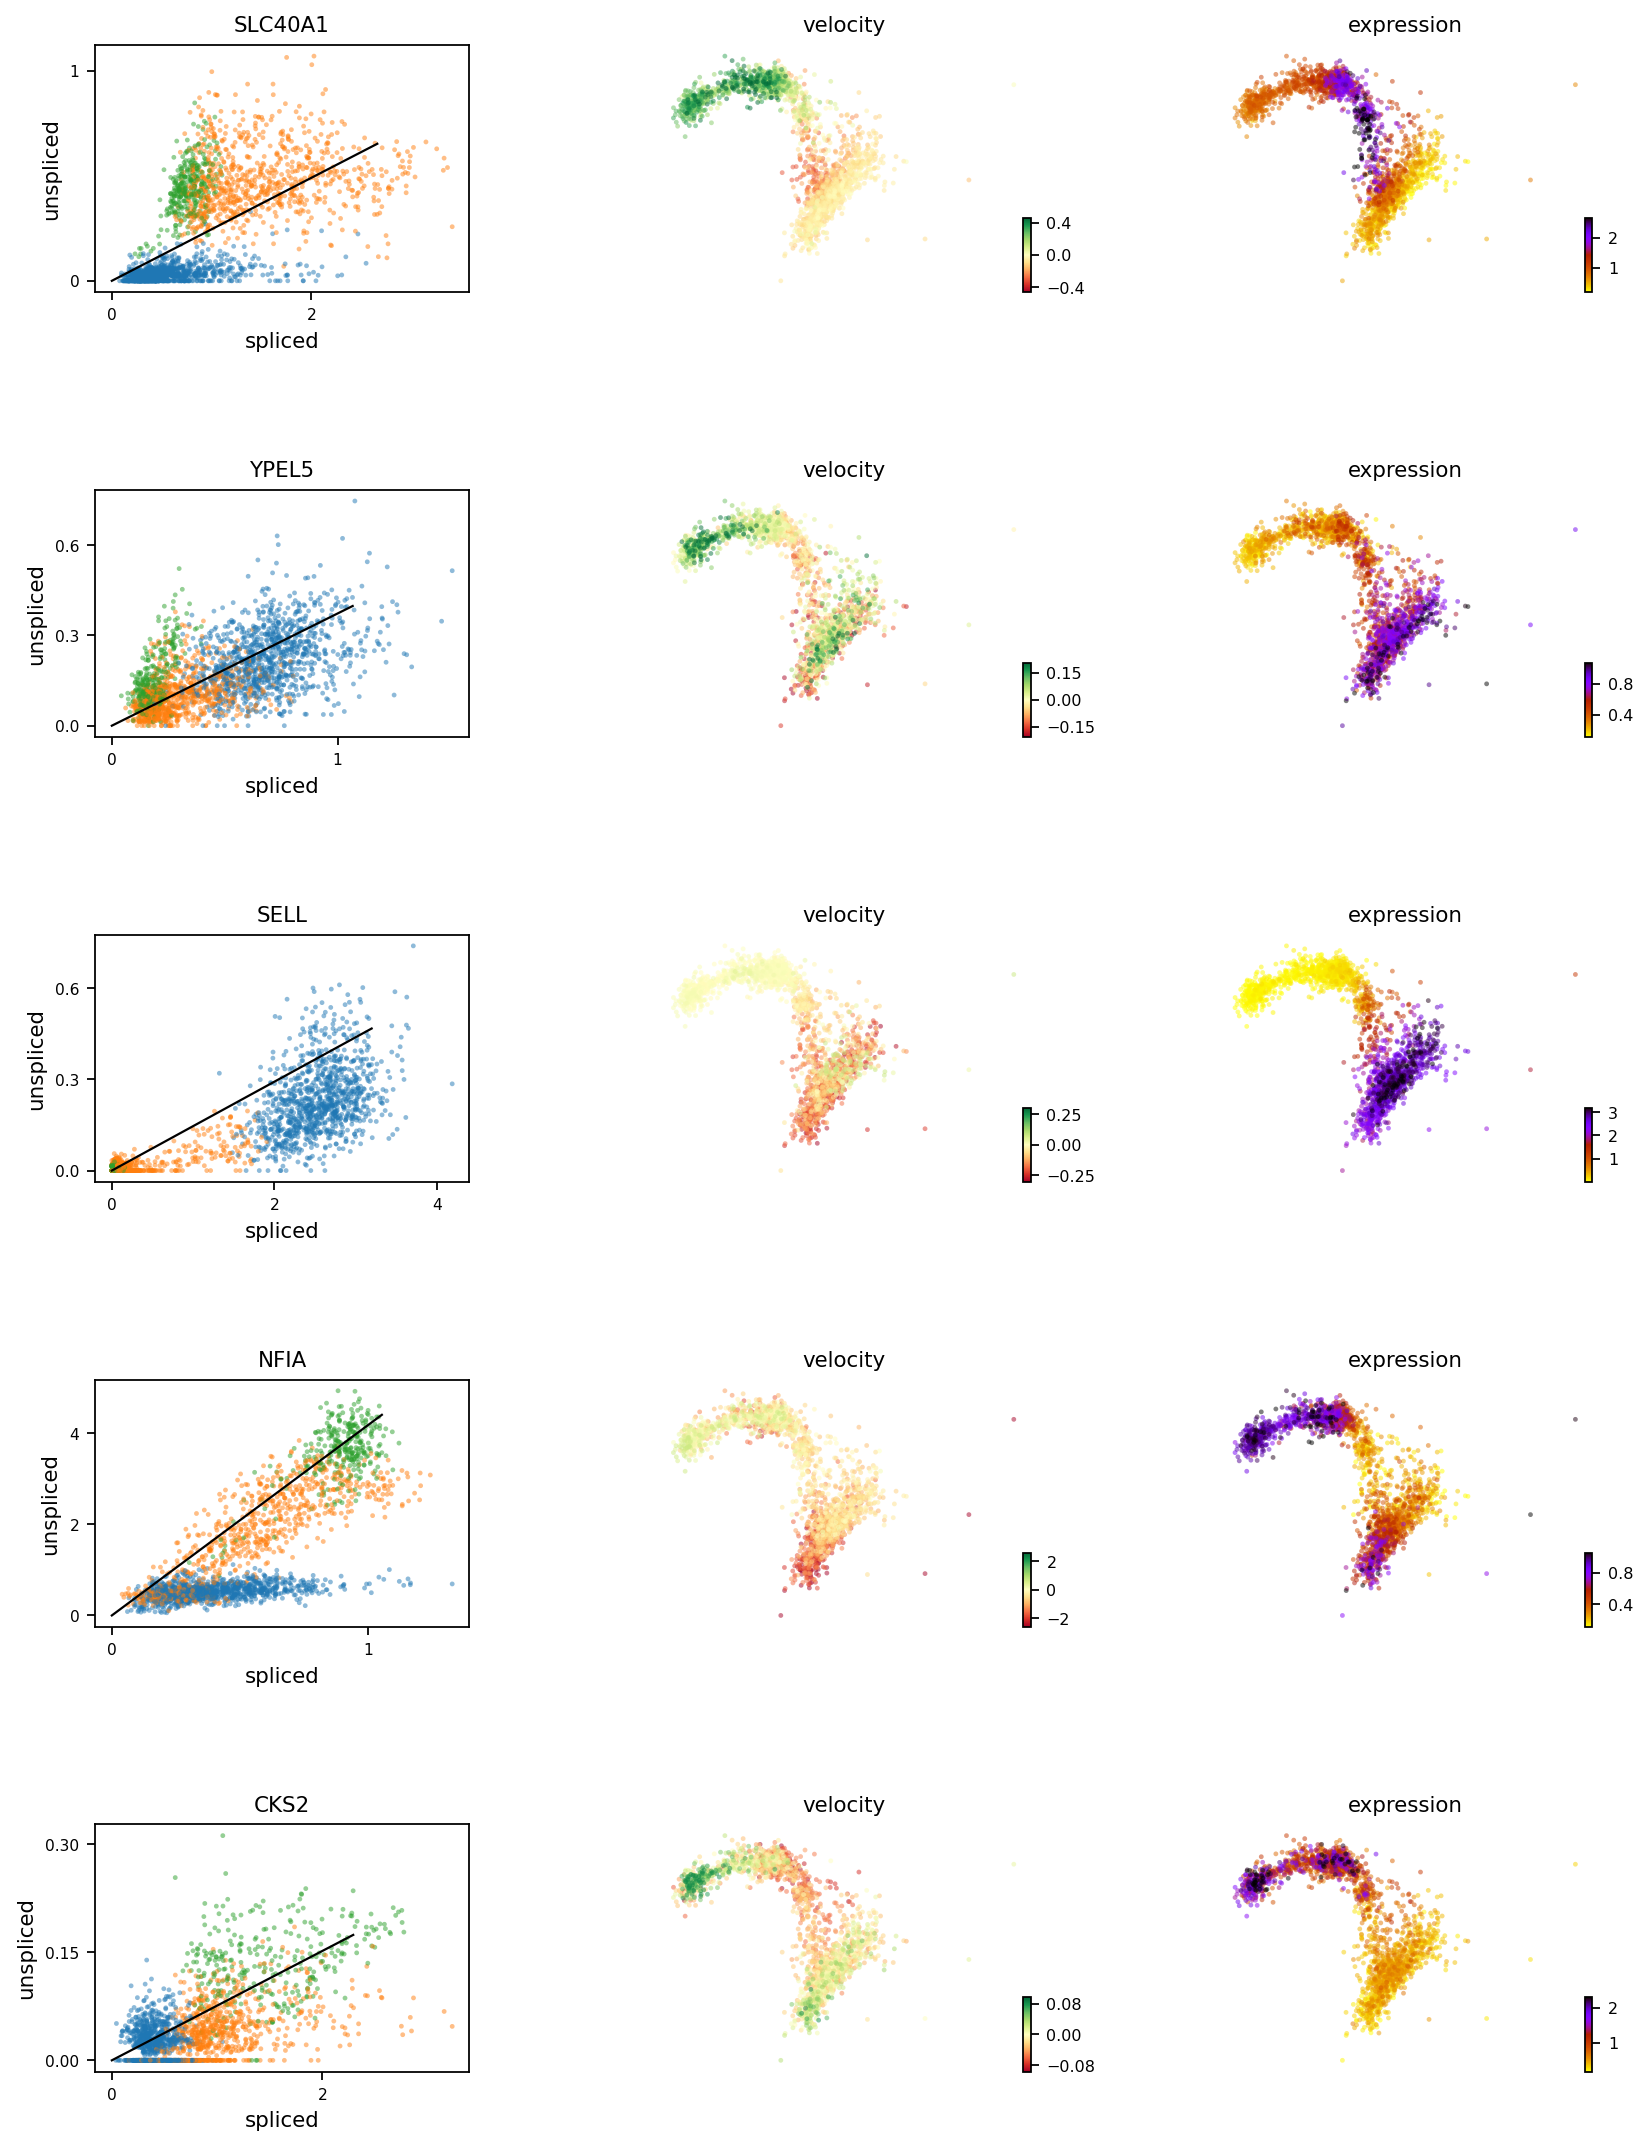

In [13]:
genes = df["7"].tolist()[0:5]
scv.pl.velocity(adata, genes, color="seurat_clusters", basis="X_fr", ncols=1, figsize=(6,5), dpi=600)

如何理解Ms和Mu矩阵：
https://www.jianshu.com/p/942f01f8bfbd

简而言之，Ms和Mu分别是经过预处理，对表达值做过矫正的spliced matrix和unspliced matrix

导出scVelo的关键结果

In [19]:
vfeatures = adata.var[adata.var.highly_variable].index
vfeatures
cellID = adata.obs.index
cellID

Index(['HS-BM-P1-cells-1_AAACCTGCAAGCGAGT-1',
       'HS-BM-P1-cells-1_AAACCTGGTACCCAAT-1',
       'HS-BM-P1-cells-1_AAACCTGTCAGCTCTC-1',
       'HS-BM-P1-cells-1_AAACGGGAGCCATCGC-1',
       'HS-BM-P1-cells-1_AAACGGGCACGAAATA-1',
       'HS-BM-P1-cells-1_AAACGGGCATGTCGAT-1',
       'HS-BM-P1-cells-1_AAACGGGGTATTACCG-1',
       'HS-BM-P1-cells-1_AAACGGGTCAGGTTCA-1',
       'HS-BM-P1-cells-1_AAAGATGGTGTGCCTG-1',
       'HS-BM-P1-cells-1_AAAGCAAAGGCCCTCA-1',
       ...
       'HS-BM-P1-cells-2_TTTATGCGTGGTACAG-1',
       'HS-BM-P1-cells-2_TTTATGCTCGGTGTCG-1',
       'HS-BM-P1-cells-2_TTTCCTCAGTTATCGC-1',
       'HS-BM-P1-cells-2_TTTCCTCGTGATAAGT-1',
       'HS-BM-P1-cells-2_TTTGCGCAGCGCTCCA-1',
       'HS-BM-P1-cells-2_TTTGCGCCATCACCCT-1',
       'HS-BM-P1-cells-2_TTTGCGCGTGGCTCCA-1',
       'HS-BM-P1-cells-2_TTTGGTTCACATGGGA-1',
       'HS-BM-P1-cells-2_TTTGGTTCAGCTGTGC-1',
       'HS-BM-P1-cells-2_TTTGTCATCGCCGTGA-1'],
      dtype='object', length=2192)

In [20]:
Ms = pd.DataFrame(adata.layers["Ms"])
Ms.index = cellID
Ms.columns = vfeatures
Ms.to_csv("../tmp/07_HS_BM_donor1.Ery_lineage.Ms.csv")

In [21]:
Mu = pd.DataFrame(adata.layers["Mu"])
Mu.index = cellID
Mu.columns = vfeatures
Mu.to_csv("../tmp/07_HS_BM_donor1.Ery_lineage.Mu.csv")

In [22]:
velo = pd.DataFrame(adata.layers["velocity"])
velo.index = cellID
velo.columns = vfeatures
velo.to_csv("../tmp/07_HS_BM_donor1.Ery_lineage.velo.csv")